In [ ]:
!pip install pandas scikit-learn xgboost

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/'embc'/

Mounted at /content/drive
/content/drive/MyDrive/embc


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score

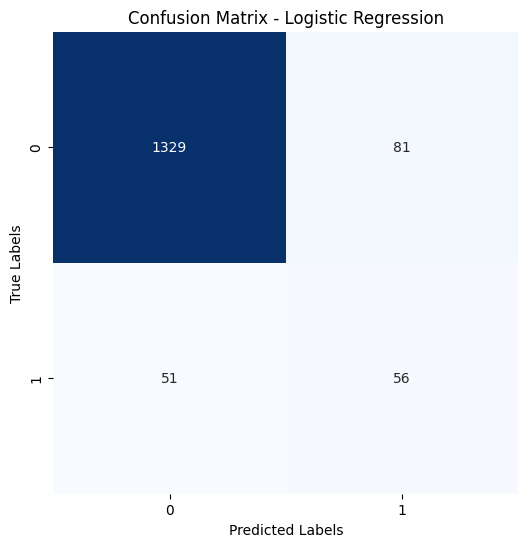

Model: Logistic Regression
Accuracy: 0.9130
AUC: 0.8484
Balanced Accuracy: 0.7330
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1410
           1       0.41      0.52      0.46       107

    accuracy                           0.91      1517
   macro avg       0.69      0.73      0.71      1517
weighted avg       0.92      0.91      0.92      1517



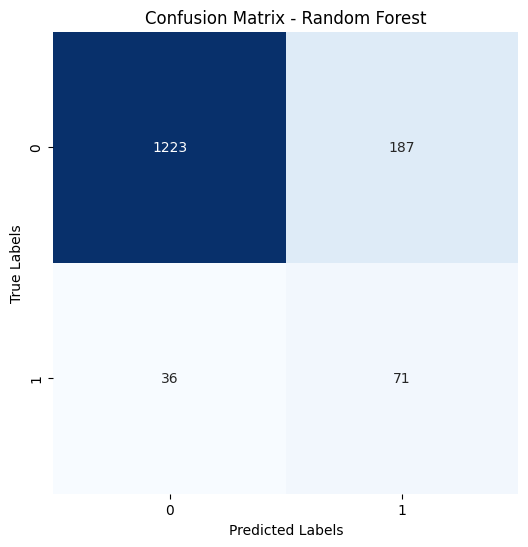

Model: Random Forest
Accuracy: 0.8530
AUC: 0.8423
Balanced Accuracy: 0.7655
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1410
           1       0.28      0.66      0.39       107

    accuracy                           0.85      1517
   macro avg       0.62      0.77      0.65      1517
weighted avg       0.92      0.85      0.88      1517



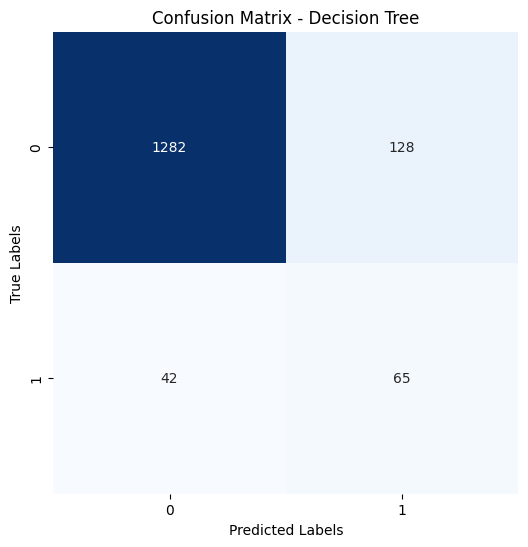

Model: Decision Tree
Accuracy: 0.8879
AUC: 0.8468
Balanced Accuracy: 0.7583
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1410
           1       0.34      0.61      0.43       107

    accuracy                           0.89      1517
   macro avg       0.65      0.76      0.69      1517
weighted avg       0.92      0.89      0.90      1517



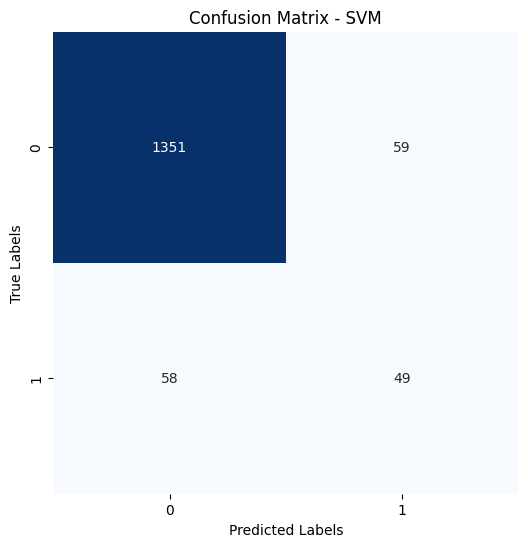

Model: SVM
Accuracy: 0.9229
AUC: 0.8156
Balanced Accuracy: 0.7080
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1410
           1       0.45      0.46      0.46       107

    accuracy                           0.92      1517
   macro avg       0.71      0.71      0.71      1517
weighted avg       0.92      0.92      0.92      1517



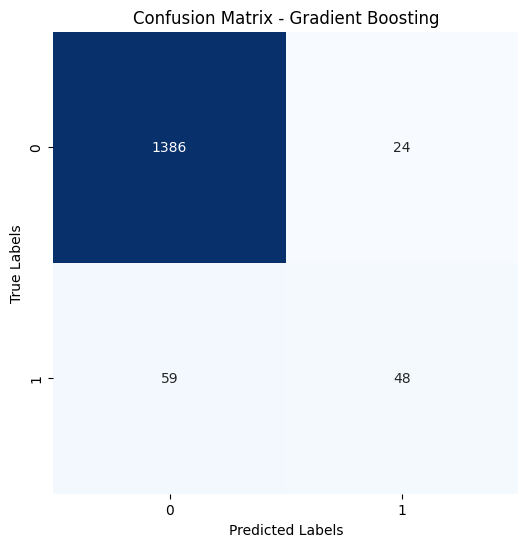

Model: Gradient Boosting
Accuracy: 0.9453
AUC: 0.8385
Balanced Accuracy: 0.7158
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1410
           1       0.67      0.45      0.54       107

    accuracy                           0.95      1517
   macro avg       0.81      0.72      0.75      1517
weighted avg       0.94      0.95      0.94      1517



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score

data = pd.read_csv("pavithra_embc.csv")
data = data.set_index('UKB ID')

y = data['K703']
X = data.drop(['K703','K74'], axis=1)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', penalty='l2', C=.001),
    "Random Forest": RandomForestClassifier(class_weight='balanced', criterion = 'entropy', max_depth = 5, min_samples_leaf = 25, min_samples_split = 200, n_estimators= 10),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', criterion= 'gini', max_depth= None, min_samples_leaf= 25, min_samples_split= 150),
    "SVM": SVC(class_weight='balanced', probability=True, C= 0.1, kernel= 'linear'),  # Enable probability estimation
    "Gradient Boosting": GradientBoostingClassifier(max_depth= 3, min_samples_leaf= 25, min_samples_split= 150, n_estimators= 50)
}

for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    preds = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)

    # Calculate AUC
    auc_value = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    balanced_acc = balanced_accuracy_score(y_test, preds)

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc_value:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")
    print("Classification Report:")
    print(report)
    print("=" * 50)

In [ ]:
data = pd.read_csv("pavithra_embc.csv")
data = data.set_index('UKB ID')

y = data['K703']
X = data.drop(['K703','K74'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

##Analysis

In [ ]:
import numpy as np
ful_cols = np.array(['F10: Mental and behavioral disorders due to use of alcohol', 'F10.1: Harmful alcohol use', 'F10.2: Alcohol Dependence syndrome', 'K76.6: Portal hypertension', 'Z72.3: Lack of physical exercise', 'Z72.4: Inappropriate diet and eating habits', 'K73: Chronic unclassified hepatitis', 'B18: Chronic viral hepatitis', 'E66 Obesity', 'E10 Insulin-dependent diabetes mellitus', 'E11 Non-insulin-dependent diabetes mellitus', 'E78 Disorders of lipoprotein metabolism and other lipidaemia', 'R94.5 Abnormal results of liver function studies', 'R76.0 Raised antibody titer'])

In [ ]:
import numpy as np
cols = np.array(['F10', 'F10.1', 'F10.2', 'K76.6', 'Z72.3', 'Z72.4', 'K73', 'B18', 'E66', 'E10', 'E11', 'E78', 'R94.5', 'R76.0'])

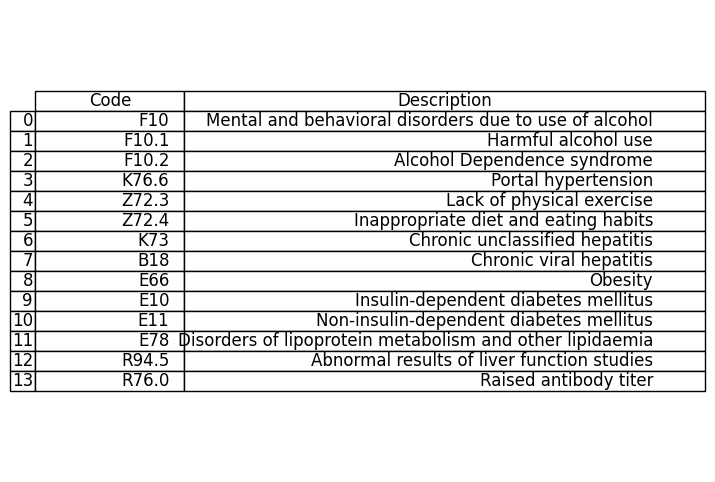

In [ ]:
import pandas as pd
from pandas.plotting import table
import matplotlib.pyplot as plt

# Your dictionary
legend_dict = {
    'F10': 'Mental and behavioral disorders due to use of alcohol',
    'F10.1': 'Harmful alcohol use',
    'F10.2': 'Alcohol Dependence syndrome',
    'K76.6': 'Portal hypertension',
    'Z72.3': 'Lack of physical exercise',
    'Z72.4': 'Inappropriate diet and eating habits',
    'K73': 'Chronic unclassified hepatitis',
    'B18': 'Chronic viral hepatitis',
    'E66': 'Obesity',
    'E10': 'Insulin-dependent diabetes mellitus',
    'E11': 'Non-insulin-dependent diabetes mellitus',
    'E78': 'Disorders of lipoprotein metabolism and other lipidaemia',
    'R94.5': 'Abnormal results of liver function studies',
    'R76.0': 'Raised antibody titer'
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(list(legend_dict.items()), columns=['Code', 'Description'])

# Create a table plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_axis_off()
tbl = table(ax, df, rowLoc='right', loc='center', colWidths=[0.2, 0.7])

# Style the table
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.2)

plt.show()


In [ ]:
from prettytable import PrettyTable

# Your dictionary
legend_dict = {
    'F10': 'Mental and behavioral disorders due to use of alcohol',
    'F10.1': 'Harmful alcohol use',
    'F10.2': 'Alcohol Dependence syndrome',
    'K76.6': 'Portal hypertension',
    'Z72.3': 'Lack of physical exercise',
    'Z72.4': 'Inappropriate diet and eating habits',
    'K73': 'Chronic unclassified hepatitis',
    'B18': 'Chronic viral hepatitis',
    'E66': 'Obesity',
    'E10': 'Insulin-dependent diabetes mellitus',
    'E11': 'Non-insulin-dependent diabetes mellitus',
    'E78': 'Disorders of lipoprotein metabolism and other lipidaemia',
    'R94.5': 'Abnormal results of liver function studies',
    'R76.0': 'Raised antibody titer'
}

# Create a PrettyTable instance
table = PrettyTable()
table.field_names = ["Code", "Description"]

# Populate the table with data from the dictionary
for code, description in legend_dict.items():
    table.add_row([code, description])
plt.savefig('legend_table.png', bbox_inches='tight', pad_inches=0.5)
# Print the table
print(table)


+-------+----------------------------------------------------------+
|  Code |                       Description                        |
+-------+----------------------------------------------------------+
|  F10  |  Mental and behavioral disorders due to use of alcohol   |
| F10.1 |                   Harmful alcohol use                    |
| F10.2 |               Alcohol Dependence syndrome                |
| K76.6 |                   Portal hypertension                    |
| Z72.3 |                Lack of physical exercise                 |
| Z72.4 |           Inappropriate diet and eating habits           |
|  K73  |              Chronic unclassified hepatitis              |
|  B18  |                 Chronic viral hepatitis                  |
|  E66  |                         Obesity                          |
|  E10  |           Insulin-dependent diabetes mellitus            |
|  E11  |         Non-insulin-dependent diabetes mellitus          |
|  E78  | Disorders of lipoprotein

<Figure size 640x480 with 0 Axes>

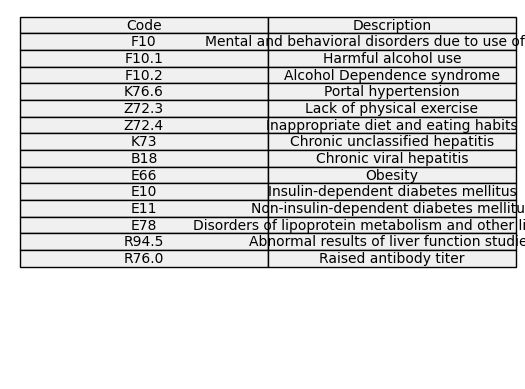

In [ ]:
import matplotlib.pyplot as plt

# Your dictionary
legend_dict = {
    'F10': 'Mental and behavioral disorders due to use of alcohol',
    'F10.1': 'Harmful alcohol use',
    'F10.2': 'Alcohol Dependence syndrome',
    'K76.6': 'Portal hypertension',
    'Z72.3': 'Lack of physical exercise',
    'Z72.4': 'Inappropriate diet and eating habits',
    'K73': 'Chronic unclassified hepatitis',
    'B18': 'Chronic viral hepatitis',
    'E66': 'Obesity',
    'E10': 'Insulin-dependent diabetes mellitus',
    'E11': 'Non-insulin-dependent diabetes mellitus',
    'E78': 'Disorders of lipoprotein metabolism and other lipidaemia',
    'R94.5': 'Abnormal results of liver function studies',
    'R76.0': 'Raised antibody titer'
}

# Create a figure
fig, ax = plt.subplots()

# Create a table
cell_text = []
for code, description in legend_dict.items():
    cell_text.append([code, description])

table = ax.table(cellText=cell_text,
                 colLabels=['Code', 'Description'],
                 loc='upper left',
                 cellLoc='center',
                 colColours=['#f0f0f0']*2,
                 cellColours=[['#f0f0f0']*2]*len(legend_dict))

# Hide the axes
ax.axis('off')

# Adjust layout for better visibility
table.auto_set_font_size(False)
table.set_fontsize(10)

# Show the plot
plt.show()


In [ ]:
# the first column is the ID column, adjust the dataframe accordingly
X_without_ids = X.iloc[:, 1:]

# Random Forest for feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# feature importances
feature_importances = rf_model.feature_importances_

dic_ion['Random Forest Classifier'] = feature_importances



import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier()  # Your GradientBoostingClassifier model
gbc.fit(X_train, y_train)  # Fit the model to your data

# Get feature importances from the trained model
feature_importances = gbc.feature_importances_

dic_ion['Gradient Boosting Classifier'] = feature_importances


import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight='balanced')  # Your DecisionTreeClassifier model
dtc.fit(X_train, y_train)  # Fit the model to your data

# Get feature importances from the trained model
feature_importances = dtc.feature_importances_

dic_ion['Decision Tree Classifier'] = feature_importances



svc = SVC(class_weight='balanced', kernel="linear", probability=True)
svc.fit(X_train, y_train)

# Get the support vectors and corresponding feature names_
support_coef = svc.coef_ #np.abs(svc.decision_function(support_vectors))


dic_ion['Support Vector Classification'] = support_coef



logreg = LogisticRegression(class_weight='balanced',C=.2)
logreg.fit(X_train, y_train)

# Get the coefficients and corresponding feature names
coefficients = abs(logreg.coef_[0])


dic_ion['Logistic Regression'] = coefficients


In [ ]:
support_coef

[0.00025135593077010897,
 0.4999368877583764,
 0.49991982518952605,
 1.0,
 0.24990001939283094,
 0.7496725785536177,
 0.999709446918613,
 0.7496683951163098,
 0.24970936442364713,
 0.0,
 0.4998810211553843,
 0.24963578052218388,
 0.24992761231056101,
 0.24990001939282694]

In [ ]:
dic_ion = {}

dic_ion['x'] = ful_cols

import matplotlib.pyplot as plt

# the first column is the ID column, adjust the dataframe accordingly
X_without_ids = X.iloc[:, 1:]

# Random Forest for feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# feature importances
feature_importances = rf_model.feature_importances_

dic_ion['Random Forest Classifier'] = feature_importances



import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier()  # Your GradientBoostingClassifier model
gbc.fit(X_train, y_train)  # Fit the model to your data

# Get feature importances from the trained model
feature_importances = gbc.feature_importances_

dic_ion['Gradient Boosting Classifier'] = feature_importances


import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight='balanced')  # Your DecisionTreeClassifier model
dtc.fit(X_train, y_train)  # Fit the model to your data

# Get feature importances from the trained model
feature_importances = dtc.feature_importances_

dic_ion['Decision Tree Classifier'] = feature_importances


# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.svm import SVC
# from sklearn.preprocessing import StandardScaler

# # Fit the SVC model
# svc = SVC(class_weight='balanced', probability=True)
# svc.fit(X_train, y_train)

# # Get the support vectors and corresponding feature names
# support_vectors = svc.support_vectors_
# support_coef = np.abs(svc.decision_function(support_vectors))

dic_ion['Support Vector Classification'] = support_coef

# support_coef_names = list(zip(support_coef, cols))

# # Sort the coefficients in descending order and select the top 5
# top_support_coef_names = sorted(support_coef_names, key=lambda x: x[0], reverse=True)

# # Unzip the sorted feature names and coefficients
# top_support_coefficients, top_support_features = zip(*top_support_coef_names)

# dic_ion['SVC Support Vectors'] = top_support_coefficients

import numpy as np
import matplotlib.pyplot as plt

logreg = LogisticRegression(class_weight='balanced',C=.2)
logreg.fit(X_train, y_train)

# Get the coefficients and corresponding feature names
coefficients = abs(logreg.coef_[0])


dic_ion['Logistic Regression'] = coefficients



{'x': array(['F10: Mental and behavioral disorders due to use of alcohol',
        'F10.1: Harmful alcohol use', 'F10.2: Alcohol Dependence syndrome',
        'K76.6: Portal hypertension', 'Z72.3: Lack of physical exercise',
        'Z72.4: Inappropriate diet and eating habits',
        'K73: Chronic unclassified hepatitis',
        'B18: Chronic viral hepatitis', 'E66 Obesity',
        'E10 Insulin-dependent diabetes mellitus',
        'E11 Non-insulin-dependent diabetes mellitus',
        'E78 Disorders of lipoprotein metabolism and other lipidaemia',
        'R94.5 Abnormal results of liver function studies',
        'R76.0 Raised antibody titer'], dtype='<U60'),
 'Random Forest Classifier': array([0.00176011, 0.06157663, 0.01691838, 0.70588085, 0.        ,
        0.01490513, 0.01089689, 0.02269506, 0.02736092, 0.02075031,
        0.03719945, 0.02923861, 0.04272134, 0.00809632]),
 'Gradient Boosting Classifier': array([7.43338599e-04, 2.75570330e-02, 5.83635472e-03, 8.71179034e-01,

In [ ]:
d = d.drop('F10.2: Alcohol Dependence syndrome')
d

,Random Forest Classifier,Gradient Boosting Classifier,Decision Tree Classifier,Support Vector Classification,Logistic Regression
x,,,,,
F10: Mental and behavioral disorders due to use of alcohol,0.001760,0.000743,0.001226,0.000251,0.376394
F10.1: Harmful alcohol use,0.061577,0.027557,0.118350,0.499937,1.161728
K76.6: Portal hypertension,0.705881,0.871179,0.668699,1.000000,3.551583
Z72.3: Lack of physical exercise,0.000000,0.000000,0.000000,0.249900,0.000000
Z72.4: Inappropriate diet and eating habits,0.014905,0.011721,0.022328,0.749673,1.055107
K73: Chronic unclassified hepatitis,0.010897,0.016320,0.013169,0.999709,0.446569
B18: Chronic viral hepatitis,0.022695,0.008996,0.011697,0.749668,0.759607
E66 Obesity,0.027361,0.011342,0.027463,0.249709,0.185194
E10 Insulin-dependent diabetes mellitus,0.020750,0.007274,0.024192,0.000000,0.413921


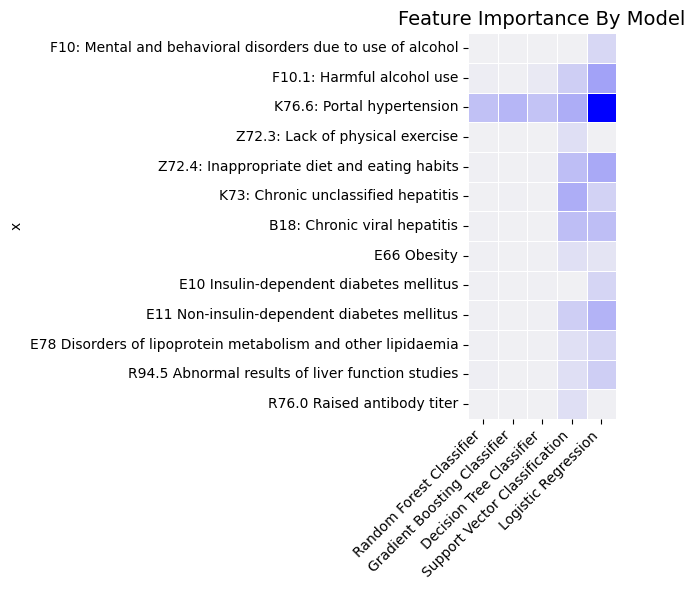

In [ ]:
# Create a custom colormap (light to dark blue)
# d = pd.DataFrame(data=dic_ion)
# d = d.set_index('x')
custom_cmap = sns.light_palette("blue", as_cmap=True)

# Create a heatmap using Seaborn with customization
plt.figure(figsize=(6, 6))
sns.heatmap(d, annot=False, cmap=custom_cmap, cbar=False, linewidths=.5, linecolor='white', square=True)
# plt.figure(figsize=(8, 8))  # Set the figsize to create square cells
# sns.heatmap(df, annot=False, cmap=custom_cmap, cbar=False, linewidths=.5, linecolor='white', square=True)



# Customize axis labels (slanted)
plt.xticks(rotation=45, ha='right')
#plt.yticks(rotation=45, ha='right')

plt.title('Feature Importance By Model', fontsize=14)

# Adjust layout to prevent labels from getting cut off
plt.tight_layout()

# Save the plot
plt.savefig('heatmap2.png', bbox_inches='tight')

plt.show()

In [ ]:
d = pd.DataFrame(data=dic_ion)
d = d.set_index('x')

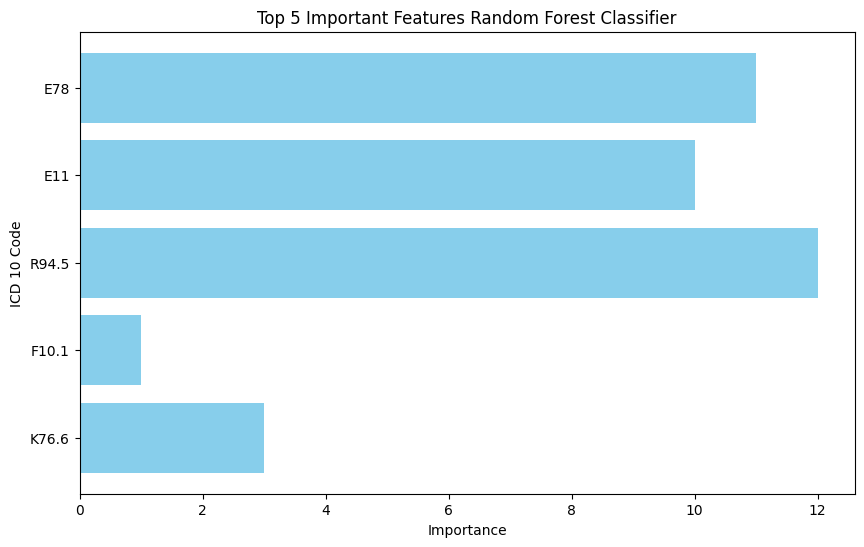

In [ ]:
import matplotlib.pyplot as plt

# the first column is the ID column, adjust the dataframe accordingly
X_without_ids = X.iloc[:, 1:]

# Random Forest for feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# feature importances
feature_importances = rf_model.feature_importances_

# indices of the top k features
k = 5  # You can change this value to the desired number of top features
top_feature_indices = feature_importances.argsort()[-k:][::-1]

# Extract the top k features
top_features = cols[top_feature_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_feature_indices, align='center', color='skyblue')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Importance')
plt.ylabel('ICD 10 Code')
plt.title('Top 5 Important Features Random Forest Classifier')
plt.savefig('my_plot1.png')
plt.show()

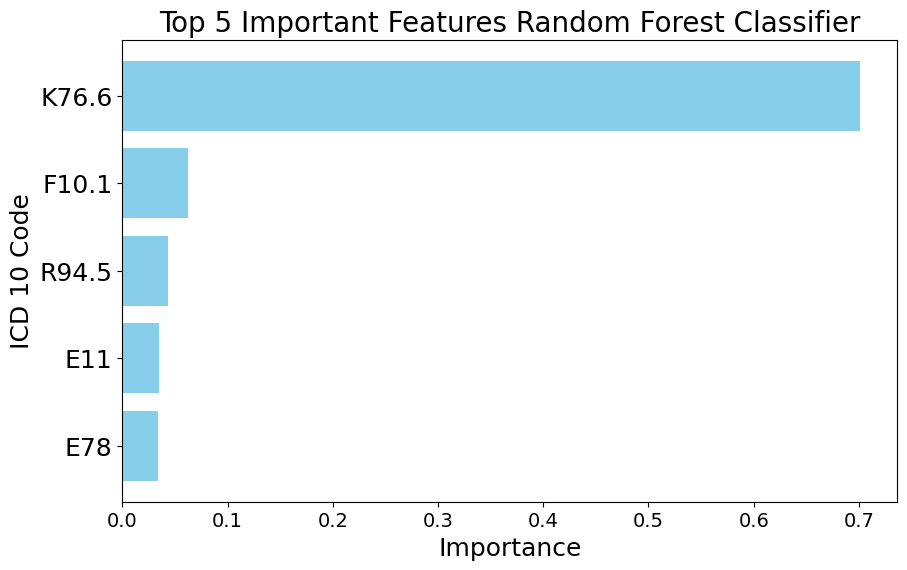

In [ ]:
import matplotlib.pyplot as plt

# the first column is the ID column, adjust the dataframe accordingly
X_without_ids = X.iloc[:, 1:]

# Random Forest for feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# feature importances
feature_importances = rf_model.feature_importances_

# indices of the top k features
k = 5  # You can change this value to the desired number of top features
top_feature_indices = feature_importances.argsort()[-k:]

# Extract the top k features
top_features = cols[top_feature_indices]

plt.figure(figsize=(10, 6))
feature_importances.sort()
plt.barh(range(len(top_features)), feature_importances[9:], align='center', color='skyblue')
plt.xticks(fontsize=14)
plt.yticks(range(len(top_features)), top_features, fontsize=18)
plt.xlabel('Importance', fontsize=18)
plt.ylabel('ICD 10 Code', fontsize=18)
plt.title('Top 5 Important Features Random Forest Classifier', fontsize=20)
plt.savefig('larger_my_plot1.png')
plt.show()

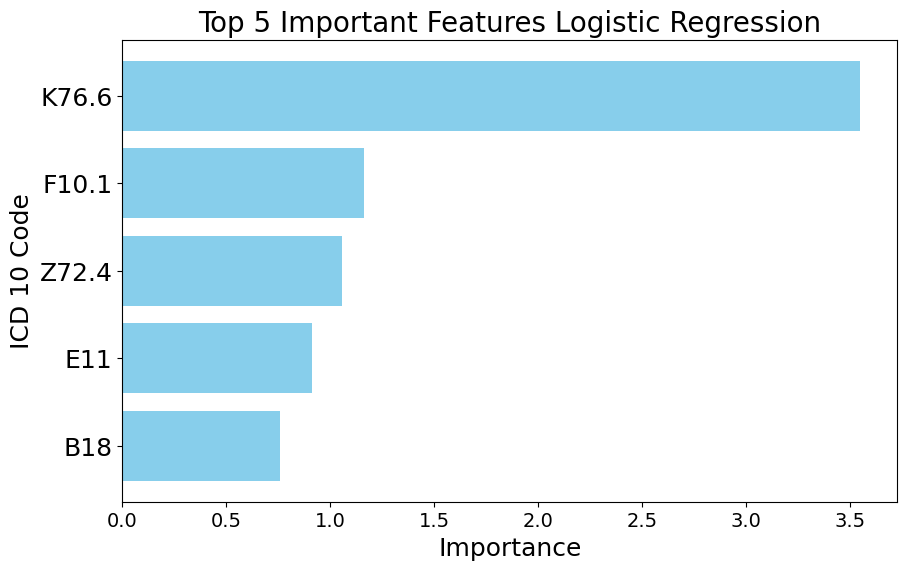

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

logreg = LogisticRegression(class_weight='balanced',C=.2)
logreg.fit(X_train, y_train)

# Get the coefficients and corresponding feature names
coefficients = logreg.coef_[0]
coef_names = list(zip(coefficients, cols))

# Sort the coefficients in descending order and select the top 5
top_coef_names = sorted(coef_names, key=lambda x: abs(x[0]), reverse=False)[8:]

# Unzip the sorted feature names and coefficients
top_coefficients, top_features = zip(*top_coef_names)

top_features = np.array(top_features)
top_features = np.delete(top_features, 1)

top_coefficients = np.array(top_coefficients)
top_coefficients = np.delete(top_coefficients, 1)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), abs(np.array(top_coefficients)), align='center', color='skyblue')
# plt.yticks(range(len(top_features)), top_features)
# plt.xlabel('Coefficient Value')
# plt.ylabel('ICD 10 Code')

plt.xticks(fontsize=14)
plt.yticks(range(len(top_features)), top_features, fontsize=18)
plt.xlabel('Importance', fontsize=18)
plt.ylabel('ICD 10 Code', fontsize=18)

plt.title('Top 5 Important Features Logistic Regression', fontsize=20)
plt.savefig('large_my_plot5.png')
plt.show()

In [ ]:
top_coefficients

(0.8968739256278041,
 0.9111903263972225,
 1.0551073383038796,
 1.1617283148700912,
 3.5515834927804164)

In [ ]:
top_features = np.array(top_features)
top_features = np.delete(top_features, 1)

array(['F10.2', 'E11', 'Z72.4', 'F10.1', 'K76.6'], dtype='<U5')

In [ ]:
range(len(top_features))

range(0, 5)

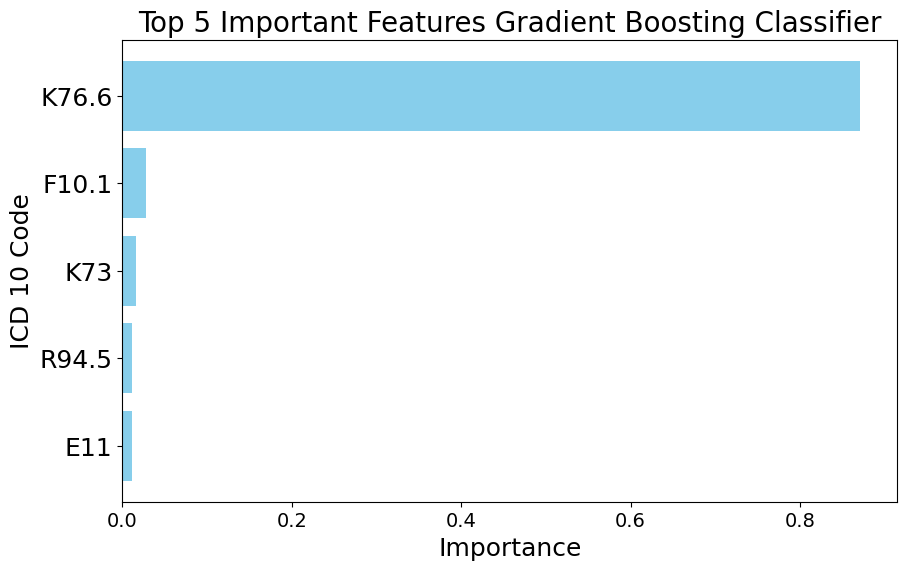

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier()  # Your GradientBoostingClassifier model
gbc.fit(X_train, y_train)  # Fit the model to your data

# Get feature importances from the trained model
feature_importances = gbc.feature_importances_

# Get the indices of the top 5 features
top_indices = np.argsort(feature_importances)[-5:]

# Get the names of the top 5 features
top_features = [cols[index] for index in top_indices]

# Get the importance values of the top 5 features
top_importances = feature_importances[top_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_importances, align='center', color='skyblue')
# plt.yticks(range(len(top_features)), top_features)
# plt.xlabel('Importance')
# plt.ylabel('ICD 10 Code')

plt.xticks(fontsize=14)
plt.yticks(range(len(top_features)), top_features, fontsize=18)
plt.xlabel('Importance', fontsize=18)
plt.ylabel('ICD 10 Code', fontsize=18)

plt.title('Top 5 Important Features Gradient Boosting Classifier', fontsize=20)
plt.savefig('large_my_plot22.png')
plt.show()


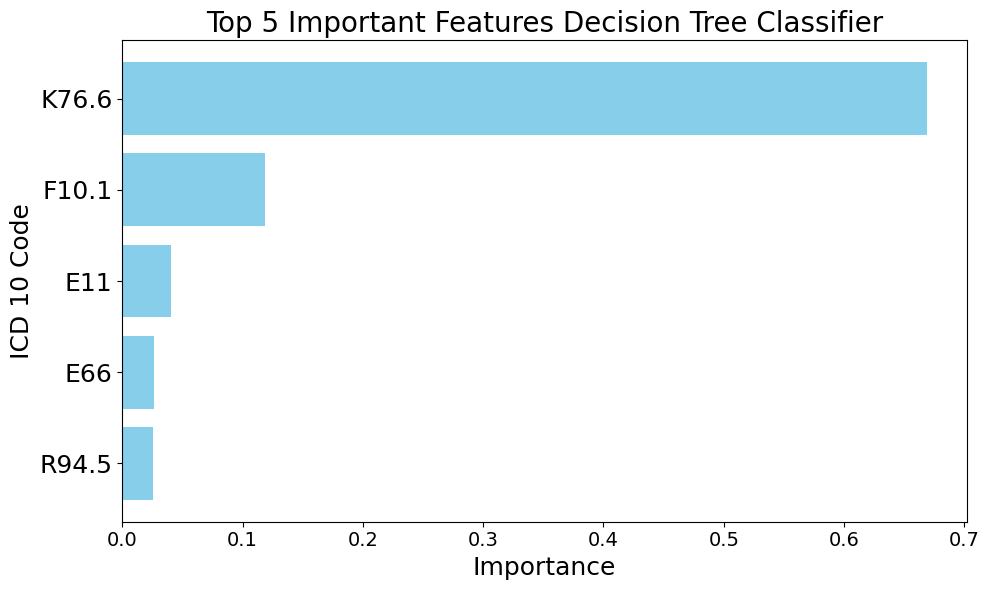

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight='balanced')  # Your DecisionTreeClassifier model
dtc.fit(X_train, y_train)  # Fit the model to your data

# Get feature importances from the trained model
feature_importances = dtc.feature_importances_

# Get the indices of the top 5 features
top_indices = np.argsort(feature_importances)[-5:]

# Get the names of the top 5 features
top_features = [cols[index] for index in top_indices]

# Get the importance values of the top 5 features
top_importances = feature_importances[top_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_importances, align='center', color='skyblue')
plt.xticks(fontsize=14)
plt.yticks(range(len(top_features)), top_features, fontsize=18)
plt.xlabel('Importance', fontsize=18)
plt.ylabel('ICD 10 Code', fontsize=18)
plt.title('Top 5 Important Features Decision Tree Classifier', fontsize=20)
plt.tight_layout()
plt.savefig('large_my_plot3.png')
plt.show()

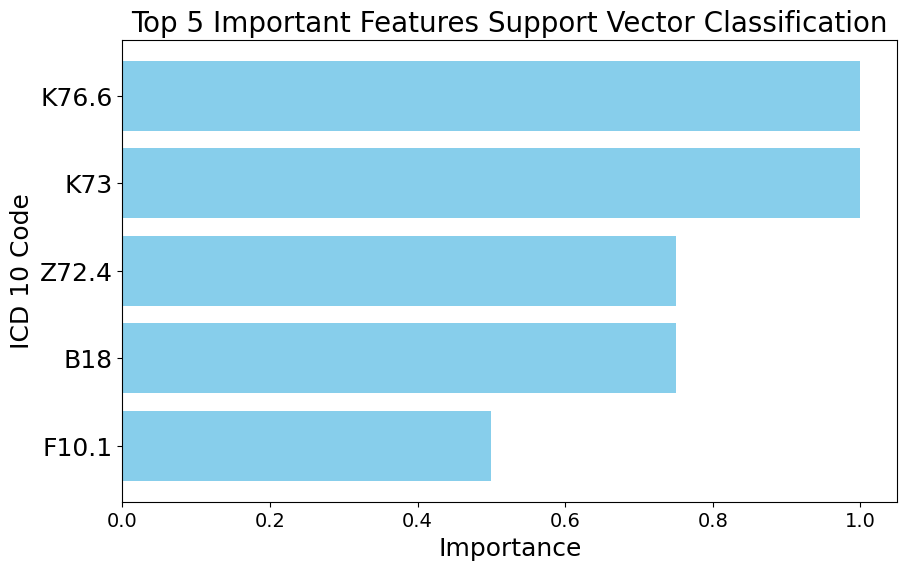

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Fit the SVC model
svc = SVC(class_weight='balanced', kernel="linear", probability=True)
svc.fit(X_train, y_train)

# Get the support vectors and corresponding feature names
support_vectors = svc.support_vectors_
support_coef = svc.coef_ #np.abs(svc.decision_function(support_vectors))
original_list = support_coef[0]

min_val = min(original_list)
max_val = max(original_list)

support_coef = [(x - min_val) / (max_val - min_val) for x in original_list]

support_coef_names = list(zip(support_coef, cols))

# Sort the coefficients in descending order and select the top 5
top_support_coef_names = sorted(support_coef_names, key=lambda x: abs(x[0]), reverse=False)[9:]

# Unzip the sorted feature names and coefficients
top_support_coefficients, top_support_features = zip(*top_support_coef_names)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_support_features)), top_support_coefficients, align='center', color='skyblue')
plt.yticks(range(len(top_support_features)), top_support_features, fontsize=18)
plt.xticks(fontsize=14)
plt.xlabel('Importance', fontsize=18)
plt.ylabel('ICD 10 Code', fontsize=18)
plt.title('Top 5 Important Features Support Vector Classification', fontsize=20)

# Set the x-axis limits to show only the region between 9 and 10
#plt.xlim(.9995, 1.0005)
plt.savefig('large_my_plot4.png')

plt.show()


In [ ]:
support_coef

[0.00025135593077010897,
 0.4999368877583764,
 0.49991982518952605,
 1.0,
 0.24990001939283094,
 0.7496725785536177,
 0.999709446918613,
 0.7496683951163098,
 0.24970936442364713,
 0.0,
 0.4998810211553843,
 0.24963578052218388,
 0.24992761231056101,
 0.24990001939282694]

In [ ]:
top_features

array(['E78', 'E11', 'R94.5', 'F10.1', 'K76.6'], dtype='<U5')

In [ ]:
feature_importances.sort()
feature_importances[9:]

array([0.03186813, 0.03562674, 0.0465144 , 0.06224192, 0.69450224])

In [ ]:
feature_importances

array([0.        , 0.00213582, 0.00839284, 0.01070667, 0.01391393,
       0.01669473, 0.02153564, 0.02528954, 0.02860151, 0.03509361,
       0.03787705, 0.04374794, 0.0614994 , 0.69451132])

In [ ]:
top_feature_indices

array([ 3,  1, 12, 10, 11])

In [ ]:
import matplotlib.pyplot as plt

# the first column is the ID column, adjust the dataframe accordingly
X_without_ids = X.iloc[:, 1:]

# Random Forest for feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# feature importances
rf_model.feature_importances_

array([0.0024396 , 0.06514958, 0.01856574, 0.69091989, 0.        ,
       0.01725501, 0.01102922, 0.0260004 , 0.02732743, 0.02142271,
       0.03636513, 0.03219587, 0.04349035, 0.00783907])

In [ ]:
import matplotlib.pyplot as plt

# the first column is the ID column, adjust the dataframe accordingly
X_without_ids = X.iloc[:, 1:]

# Random Forest for feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# feature importances
feature_importances = rf_model.feature_importances_

In [ ]:
rf_model.feature_importances_

array([0.00483387, 0.06724106, 0.01857228, 0.66700067, 0.        ,
       0.01575516, 0.01301806, 0.02834746, 0.02755015, 0.02499545,
       0.04090702, 0.03427548, 0.04962076, 0.00788258])

In [ ]:
dic_ion = {}

dic_ion['x'] = ful_cols

import matplotlib.pyplot as plt

# the first column is the ID column, adjust the dataframe accordingly
X_without_ids = X.iloc[:, 1:]

# Random Forest for feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# feature importances
feature_importances = rf_model.feature_importances_

dic_ion['Random Forest Classifier'] = feature_importances



import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier()  # Your GradientBoostingClassifier model
gbc.fit(X_train, y_train)  # Fit the model to your data

# Get feature importances from the trained model
feature_importances = gbc.feature_importances_

dic_ion['Gradient Boosting Classifier'] = feature_importances


import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight='balanced')  # Your DecisionTreeClassifier model
dtc.fit(X_train, y_train)  # Fit the model to your data

# Get feature importances from the trained model
feature_importances = dtc.feature_importances_

dic_ion['Decision Tree Classifier'] = feature_importances


import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Fit the SVC model
svc = SVC(class_weight='balanced', probability=True)
svc.fit(X_train, y_train)

# Get the support vectors and corresponding feature names
support_vectors = svc.support_vectors_
support_coef = np.abs(svc.decision_function(support_vectors))

dic_ion['SVC Support Vectors'] = support_coef

support_coef_names = list(zip(support_coef, cols))

# Sort the coefficients in descending order and select the top 5
top_support_coef_names = sorted(support_coef_names, key=lambda x: x[0], reverse=True)

# Unzip the sorted feature names and coefficients
top_support_coefficients, top_support_features = zip(*top_support_coef_names)

dic_ion['SVC Support Vectors'] = top_support_coefficients

import numpy as np
import matplotlib.pyplot as plt

logreg = LogisticRegression(class_weight='balanced',C=.2)
logreg.fit(X_train, y_train)

# Get the coefficients and corresponding feature names
coefficients = abs(logreg.coef_[0])


dic_ion['Logistic Regression'] = coefficients



In [ ]:
for key in dic_ion.keys():
  print(len(dic_ion[key]))

14
14
14
14
14
14


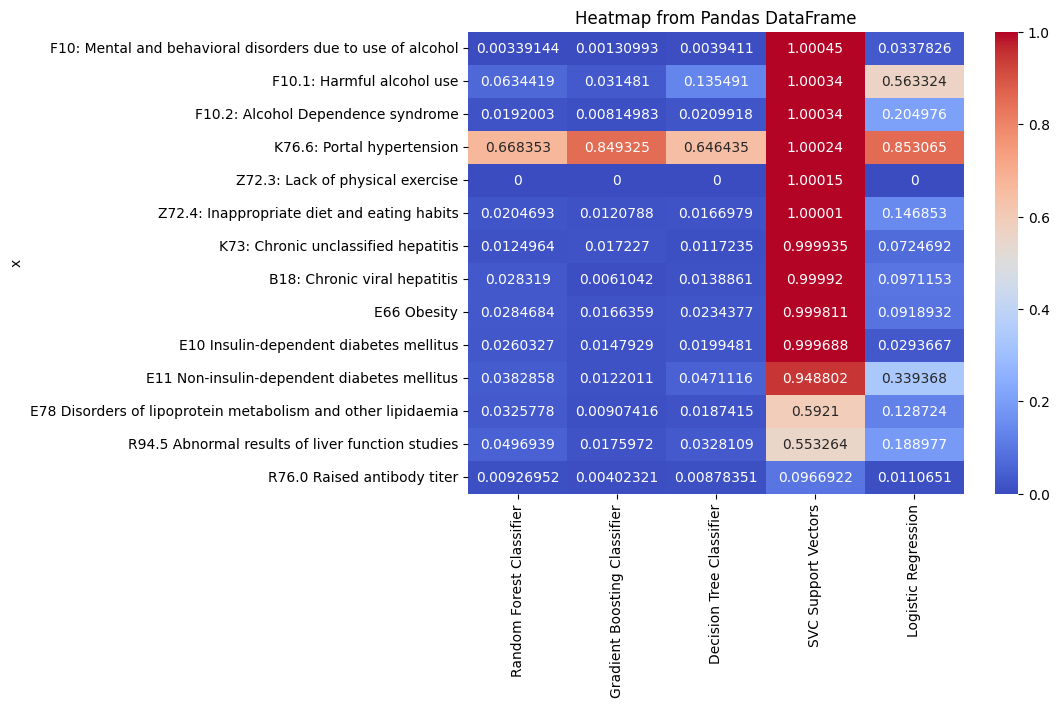

In [ ]:
d = pd.DataFrame(data=dic_ion)
d = d.set_index('x')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(d, annot=True, cmap='coolwarm', fmt='g')
plt.title('Heatmap from Pandas DataFrame')
plt.show()

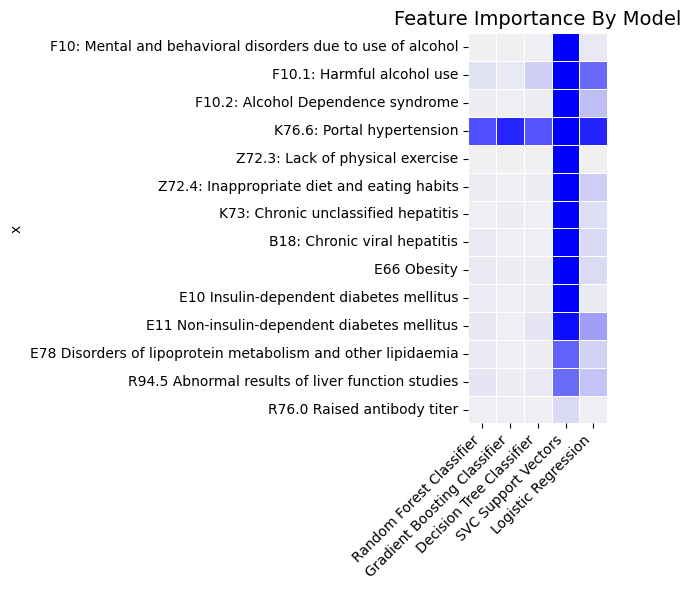

In [ ]:
# Create a custom colormap (light to dark blue)
custom_cmap = sns.light_palette("blue", as_cmap=True)

# Create a heatmap using Seaborn with customization
plt.figure(figsize=(6, 6))
sns.heatmap(d, annot=False, cmap=custom_cmap, cbar=False, linewidths=.5, linecolor='white', square=True)
# plt.figure(figsize=(8, 8))  # Set the figsize to create square cells
# sns.heatmap(df, annot=False, cmap=custom_cmap, cbar=False, linewidths=.5, linecolor='white', square=True)



# Customize axis labels (slanted)
plt.xticks(rotation=45, ha='right')
#plt.yticks(rotation=45, ha='right')

plt.title('Feature Importance By Model', fontsize=14)

# Adjust layout to prevent labels from getting cut off
plt.tight_layout()

# Save the plot
plt.savefig('heatmap.png')

plt.show()

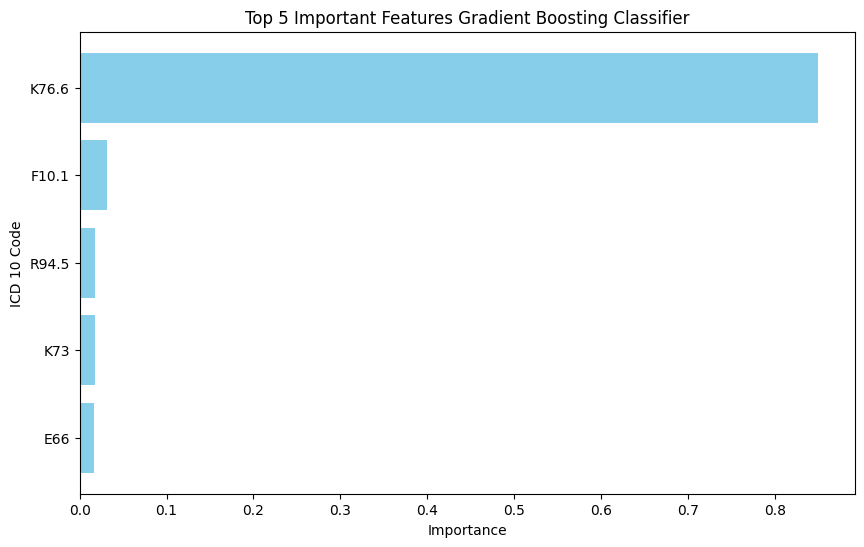

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier()  # Your GradientBoostingClassifier model
gbc.fit(X_train, y_train)  # Fit the model to your data

# Get feature importances from the trained model
feature_importances = gbc.feature_importances_

# Get the indices of the top 5 features
top_indices = np.argsort(feature_importances)[-5:]

# Get the names of the top 5 features
top_features = [cols[index] for index in top_indices]

# Get the importance values of the top 5 features
top_importances = feature_importances[top_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_importances, align='center', color='skyblue')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Importance')
plt.ylabel('ICD 10 Code')
plt.title('Top 5 Important Features Gradient Boosting Classifier')
plt.savefig('my_plot2.png')
plt.show()


In [ ]:
feature_importances

array([0.00130993, 0.03147827, 0.00814976, 0.84932482, 0.        ,
       0.01207882, 0.017227  , 0.00611295, 0.01663593, 0.01479288,
       0.01385682, 0.00740972, 0.01759989, 0.00402321])

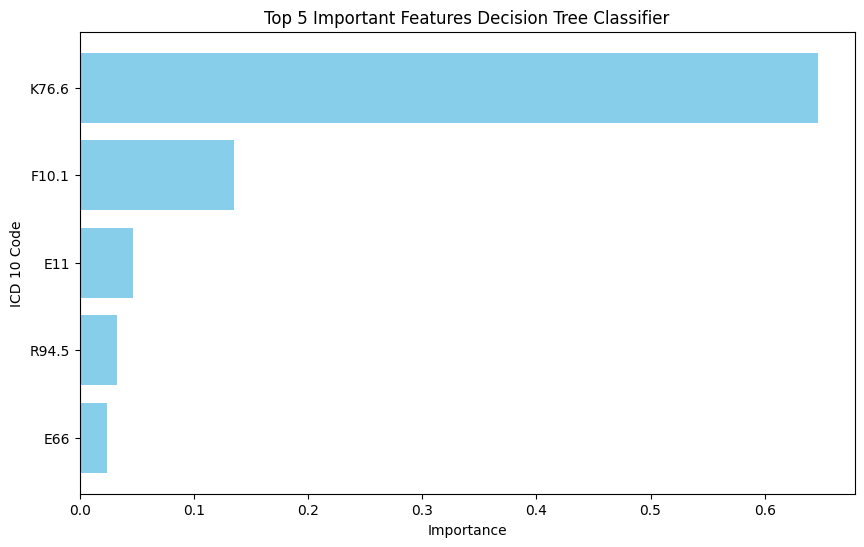

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(class_weight='balanced')  # Your DecisionTreeClassifier model
dtc.fit(X_train, y_train)  # Fit the model to your data

# Get feature importances from the trained model
feature_importances = dtc.feature_importances_

# Get the indices of the top 5 features
top_indices = np.argsort(feature_importances)[-5:]

# Get the names of the top 5 features
top_features = [cols[index] for index in top_indices]

# Get the importance values of the top 5 features
top_importances = feature_importances[top_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_importances, align='center', color='skyblue')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Importance')
plt.ylabel('ICD 10 Code')
plt.title('Top 5 Important Features Decision Tree Classifier')
plt.savefig('my_plot3.png')
plt.show()


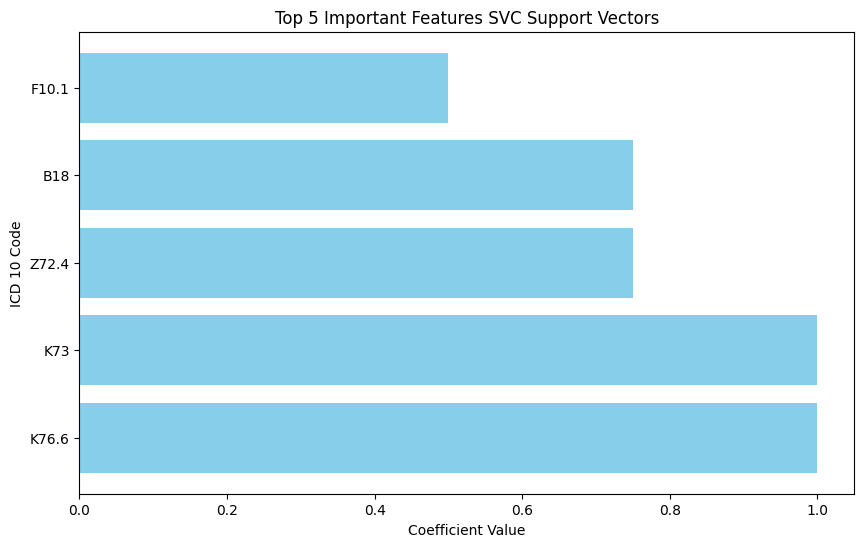

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Fit the SVC model
svc = SVC(class_weight='balanced', kernel="linear", probability=True)
svc.fit(X_train, y_train)

# Get the support vectors and corresponding feature names
support_vectors = svc.support_vectors_
support_coef = svc.coef_ #np.abs(svc.decision_function(support_vectors))
original_list = support_coef[0]

min_val = min(original_list)
max_val = max(original_list)

support_coef = [(x - min_val) / (max_val - min_val) for x in original_list]

support_coef_names = list(zip(support_coef, cols))

# Sort the coefficients in descending order and select the top 5
top_support_coef_names = sorted(support_coef_names, key=lambda x: abs(x[0]), reverse=True)[:5]

# Unzip the sorted feature names and coefficients
top_support_coefficients, top_support_features = zip(*top_support_coef_names)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_support_features)), top_support_coefficients, align='center', color='skyblue')
plt.yticks(range(len(top_support_features)), top_support_features)
plt.xlabel('Coefficient Value')
plt.ylabel('ICD 10 Code')
plt.title('Top 5 Important Features SVC Support Vectors')

# Set the x-axis limits to show only the region between 9 and 10
#plt.xlim(.9995, 1.0005)
#plt.savefig('my_plot4.png')

plt.show()


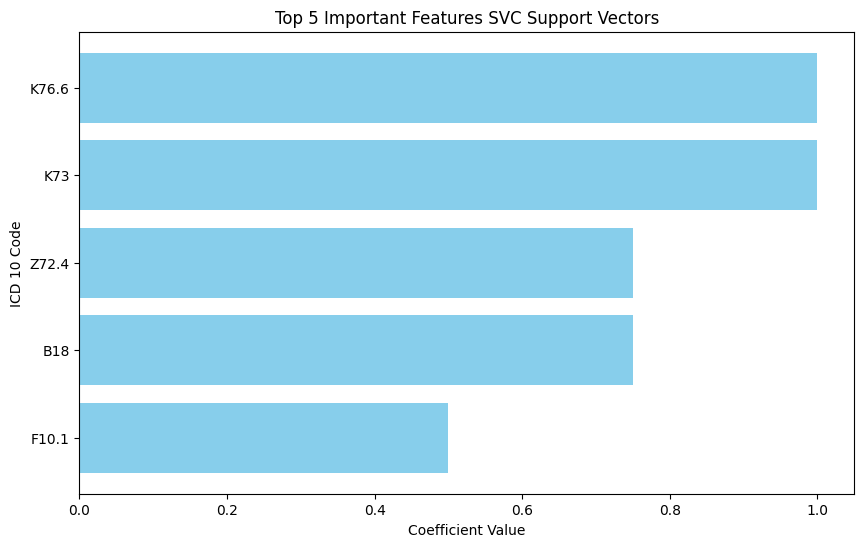

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Fit the SVC model
svc = SVC(class_weight='balanced', kernel="linear", probability=True)
svc.fit(X_train, y_train)

# Get the support vectors and corresponding feature names
support_vectors = svc.support_vectors_
support_coef = svc.coef_ #np.abs(svc.decision_function(support_vectors))
original_list = support_coef[0]

min_val = min(original_list)
max_val = max(original_list)

support_coef = [(x - min_val) / (max_val - min_val) for x in original_list]

support_coef_names = list(zip(support_coef, cols))

# Sort the coefficients in descending order and select the top 5
top_support_coef_names = sorted(support_coef_names, key=lambda x: abs(x[0]), reverse=False)[9:]

# Unzip the sorted feature names and coefficients
top_support_coefficients, top_support_features = zip(*top_support_coef_names)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_support_features)), top_support_coefficients, align='center', color='skyblue')
plt.yticks(range(len(top_support_features)), top_support_features)
plt.xlabel('Coefficient Value')
plt.ylabel('ICD 10 Code')
plt.title('Top 5 Important Features SVC Support Vectors')

# Set the x-axis limits to show only the region between 9 and 10
#plt.xlim(.9995, 1.0005)
#plt.savefig('my_plot4.png')

plt.show()


In [ ]:
original_list = [0.2, 0.5, 0.8, 0.3, 0.6]

min_val = min(original_list)
max_val = max(original_list)

rescaled_list = [(x - min_val) / (max_val - min_val) for x in original_list]

print("Original list:", original_list)
print("Rescaled list:", rescaled_list)


In [ ]:
support_coef[0]

array([-6.65785768e-01,  6.66821068e-01,  6.66775564e-01,  2.00043487e+00,
        0.00000000e+00,  1.33283893e+00,  1.99966000e+00,  1.33282777e+00,
       -5.08456017e-04, -6.66456106e-01,  6.66672078e-01, -7.04696259e-04,
        7.35873033e-05, -1.06581410e-14])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


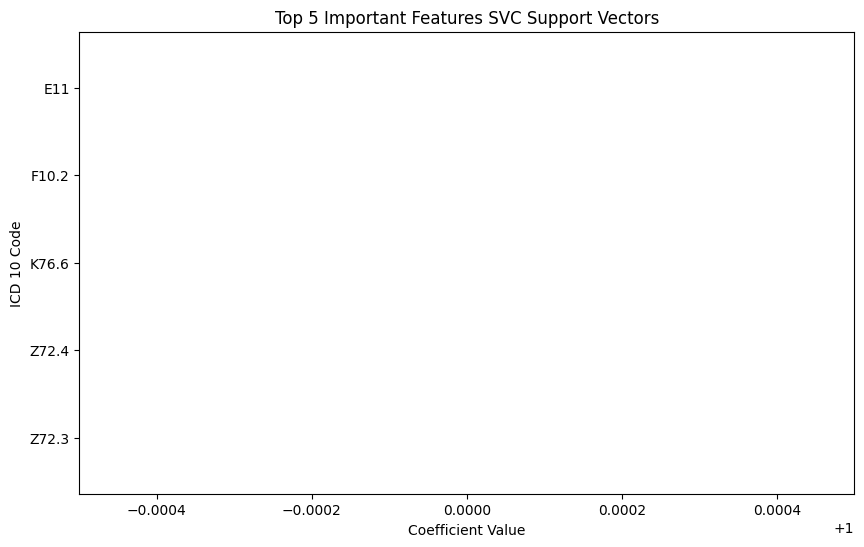

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Fit the SVC model
svc = SVC(class_weight='balanced', probability=True)
svc.fit(X_train, y_train)

# Get the support vectors and corresponding feature names
support_vectors = svc.support_vectors_
support_coef = np.abs(svc.decision_function(support_vectors))
support_coef_names = list(zip(support_coef, cols))

# Sort the coefficients in descending order and select the top 5
top_support_coef_names = sorted(support_coef_names, key=lambda x: abs(x[0]), reverse=False)[:5]

# Unzip the sorted feature names and coefficients
top_support_coefficients, top_support_features = zip(*top_support_coef_names)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_support_features)), top_support_coefficients, align='center', color='skyblue')
plt.yticks(range(len(top_support_features)), top_support_features)
plt.xlabel('Coefficient Value')
plt.ylabel('ICD 10 Code')
plt.title('Top 5 Important Features SVC Support Vectors')

# Set the x-axis limits to show only the region between 9 and 10
plt.xlim(.9995, 1.0005)
#plt.savefig('my_plot4.png')

plt.show()

In [ ]:
# Fit the SVC model
svc = SVC(class_weight='balanced', probability=True)
svc.fit(X_train, y_train)

# Get the support vectors and corresponding feature names
support_vectors = svc.support_vectors_
support_coef = np.abs(svc.decision_function(support_vectors))
support_coef_names = list(zip(support_coef, cols))

# Sort the coefficients in descending order and select the top 5
top_support_coef_names = sorted(support_coef_names, key=lambda x: abs(x[0]), reverse=True)

# Unzip the sorted feature names and coefficients
top_support_coefficients, top_support_features = zip(*top_support_coef_names)
top_support_coefficients

(1.0002324370677242,
 1.0001650284541073,
 1.000027641372329,
 0.9999923947434224,
 0.9999923947434224,
 0.9997066754430812,
 0.9996955341173348,
 0.9996419488736905,
 0.9811187342098633,
 0.7984639243867115,
 0.42486323390763303,
 0.2704884548926776,
 0.26148960685745837,
 0.10054983463805)

In [ ]:
# Fit the SVC model
svc = SVC(class_weight='balanced', probability=True)
svc.fit(X_train, y_train)

# Get the support vectors and corresponding feature names
support_vectors = svc.support_vectors_
support_coef = np.abs(svc.decision_function(support_vectors))
support_coef_names = list(zip(support_coef, cols))

# Sort the coefficients in descending order and select the top 5
top_support_coef_names = sorted(support_coef_names, key=lambda x: x[0], reverse=True)

# Unzip the sorted feature names and coefficients
top_support_coefficients, top_support_features = zip(*top_support_coef_names)
top_support_coefficients

(1.0002324370677242,
 1.0001650284541073,
 1.000027641372329,
 0.9999923947434224,
 0.9999923947434224,
 0.9997066754430812,
 0.9996955341173348,
 0.9996419488736905,
 0.9811187342098633,
 0.7984639243867115,
 0.42486323390763303,
 0.2704884548926776,
 0.26148960685745837,
 0.10054983463805)

In [ ]:
top_support_features

('E78', 'K73', 'E10', 'E11', 'Z724')

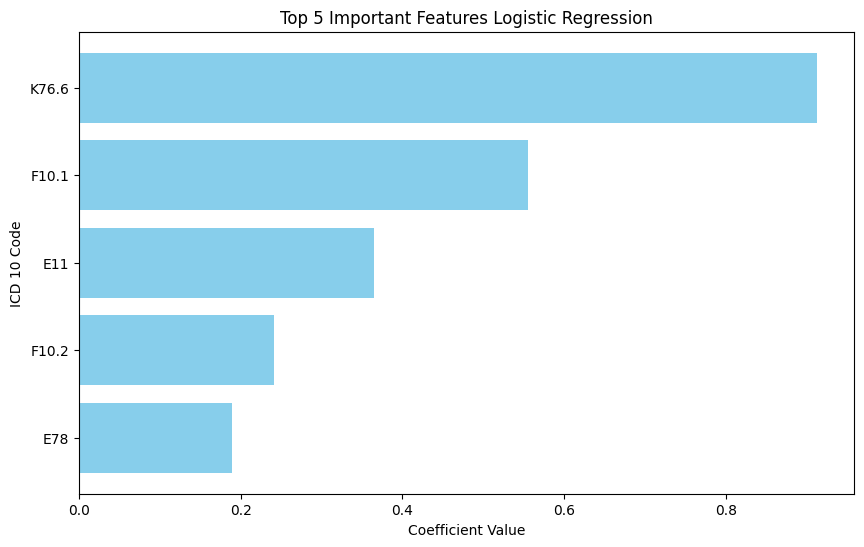

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

logreg = LogisticRegression(class_weight='balanced',C=.2)
logreg.fit(X_train, y_train)

# Get the coefficients and corresponding feature names
coefficients = logreg.coef_[0]
coef_names = list(zip(coefficients, cols))

# Sort the coefficients in descending order and select the top 5
top_coef_names = sorted(coef_names, key=lambda x: abs(x[0]), reverse=False)[9:]

# Unzip the sorted feature names and coefficients
top_coefficients, top_features = zip(*top_coef_names)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), abs(np.array(top_coefficients)), align='center', color='skyblue')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Coefficient Value')
plt.ylabel('ICD 10 Code')
plt.title('Top 5 Important Features Logistic Regression')
plt.savefig('my_plot5.png')
plt.show()

In [ ]:
abs(np.array(top_coefficients))

array([0.18880421, 0.24137319, 0.36510123, 0.55520881, 0.91313   ])

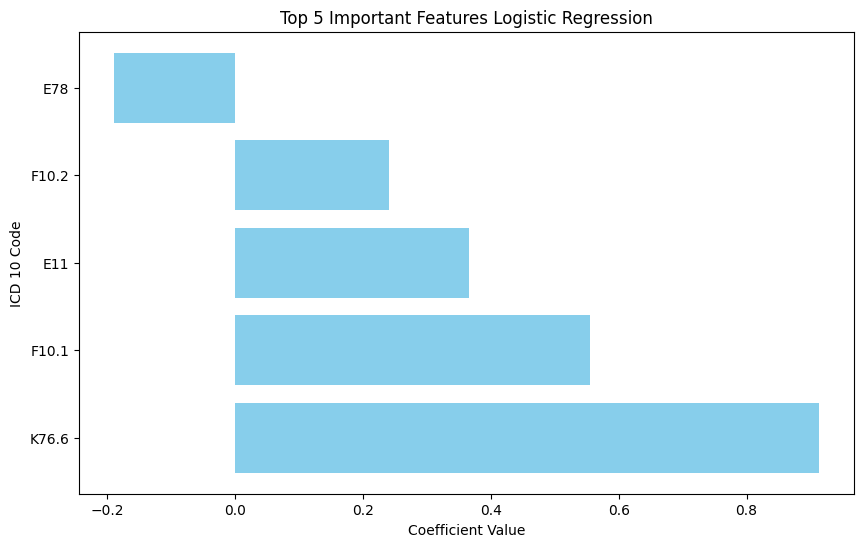

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

logreg = LogisticRegression(class_weight='balanced',C=.2)
logreg.fit(X_train, y_train)

# Get the coefficients and corresponding feature names
coefficients = logreg.coef_[0]
coef_names = list(zip(coefficients, cols))

# Sort the coefficients in descending order and select the top 5
top_coef_names = sorted(coef_names, key=lambda x: abs(x[0]), reverse=True)[:5]

# Unzip the sorted feature names and coefficients
top_coefficients, top_features = zip(*top_coef_names)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_coefficients, align='center', color='skyblue')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Coefficient Value')
plt.ylabel('ICD 10 Code')
plt.title('Top 5 Important Features Logistic Regression')
plt.savefig('my_plot5.png')
plt.show()

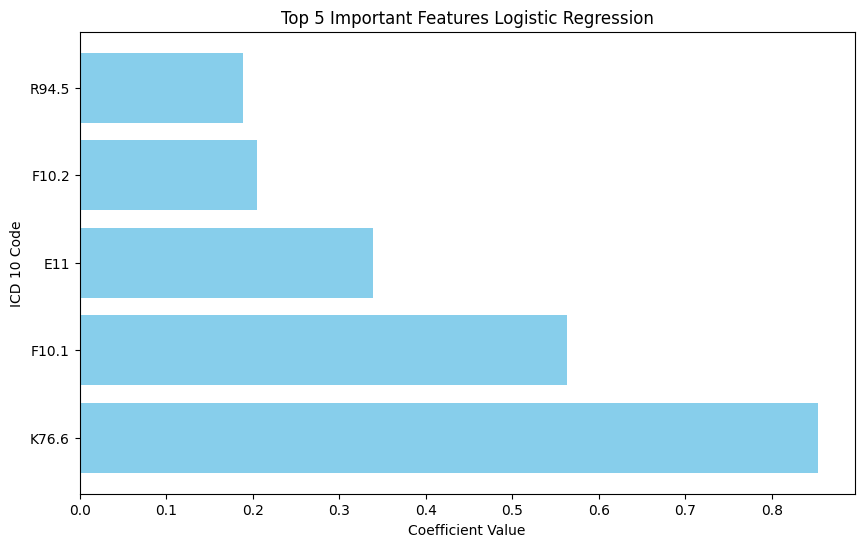

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

logreg = LogisticRegression(class_weight='balanced',C=.2)
logreg.fit(X_train, y_train)

# Get the coefficients and corresponding feature names
coefficients = logreg.coef_[0]
coef_names = list(zip(coefficients, cols))

# Sort the coefficients in descending order and select the top 5
top_coef_names = sorted(coef_names, key=lambda x: abs(x[0]), reverse=True)[:5]

# Unzip the sorted feature names and coefficients
top_coefficients, top_features = zip(*top_coef_names)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_coefficients, align='center', color='skyblue')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Coefficient Value')
plt.ylabel('ICD 10 Code')
plt.title('Top 5 Important Features Logistic Regression')
plt.savefig('my_plot5.png')
plt.show()


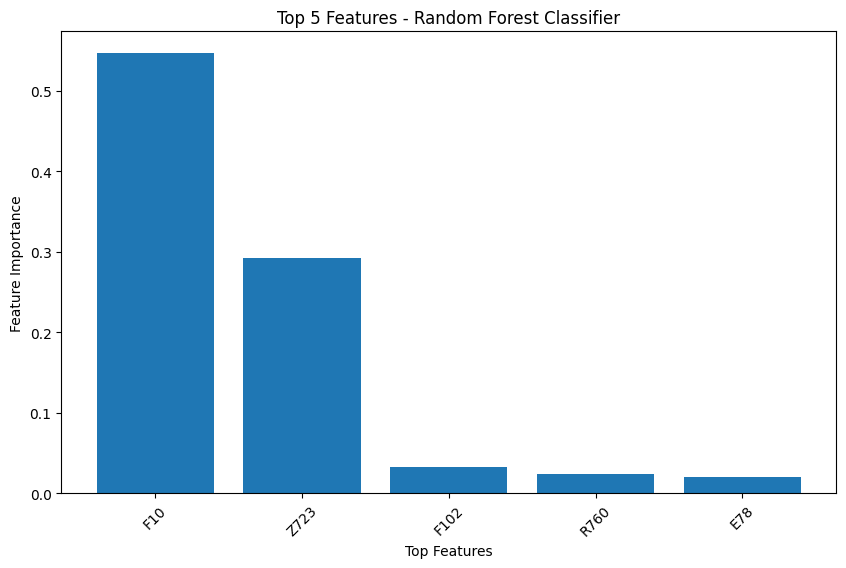

In [ ]:
import matplotlib.pyplot as plt

# the first column is the ID column, adjust the dataframe accordingly
X_without_ids = X.iloc[:, 1:]

# Random Forest for feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# feature importances
feature_importances = rf_model.feature_importances_

# indices of the top k features
k = 5  # You can change this value to the desired number of top features
top_feature_indices = feature_importances.argsort()[-k:][::-1]

# Extract the top k features
top_features = X_without_ids.columns[top_feature_indices]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(k), feature_importances[top_feature_indices], align='center')
plt.xticks(range(k), top_features, rotation=45)
plt.xlabel('Top Features')
plt.ylabel('Feature Importance')
plt.title(f'Top {k} Features - Random Forest Classifier')
plt.show()


In [ ]:
##############################
###Please Manually Fix This###
##############################

import matplotlib.pyplot as plt

# Collect accuracy scores
accuracy_scores = {}

for name, preds in models.items():
    accuracy = accuracy_score(y_test, preds)
    accuracy_scores[name] = accuracy

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(.99999, 1)
plt.show()
